# Demographics Analysis

Aim: find whether the patients being used are outliers which could interfere with the classification.

### Step 1: import data and separate into trinary classes.

In [1]:
import matplotlib as mpl
import plotly.express as px
import seaborn as sns
palette = px.colors.qualitative.Plotly
palette, _ = px.colors.convert_colors_to_same_type(palette, colortype='tuple')
palette = [mpl.colors.rgb2hex(color) for color in palette]
px.defaults.color_discrete_sequence = palette
sns.set_palette(sns.color_palette(palette))
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
sns.set_context("notebook", rc={"axes.labelweight": "bold"})
mpl.rcParams['scatter.marker'] = 'o'
mpl.rcParams['lines.markersize']=20

In [2]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('actionable_data/Clinical indicators.xlsx')

# Convert data to array
data_array = df.values

# Get column names as a separate list
column_names = df.columns.tolist()

print(column_names)
print(data_array)

['number', 'gender', 'age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)', 'Diabetic Complications', 'Diabetic nephropathy', 'Diabetic retinopathy and cataract', 'Diabetic peripheral neuropathy', 'Coronary artery disease and cardiac insufficiency', 'Lower extremity atherosclerosis or stenosis', 'Carotid plaque']
[[20050628 'male' 48 ... 0.0 0.0 0.0]
 [20052606 'male' 38 ... 0.0 0.0 0.0]
 [20061729 'male' 41 ... 0.0 0.0 0.0]
 ...
 [20123037 'male' 49 ... 0.0 0.0 0.0]
 [20124047 'male' 49 ... 0.0 0.0 0.0]
 [20125096 'male' 74 ... 1.0 0.0 0.0]]


As we can see, all patients have been imported but we are only interested in those which have ECG data in 3 classes:

1. Diabetics
2. Diabetics with other complications
3. DPN patients

We know in advance the patient ids of each class

In [3]:
Diabetics= ['19070921', '19072205', '19072214', '19072938', '19072939', '19072940', '19080106', '19081506', '19082406', '19090308', '19090320', '19102102', '19102524', '19112609', '19121303', '19121735', '20050628', '20052606', '20061729', '20120922', '20121033', '20121718']
Diabetics_complications= ['19080715', '19101607', '19102103', '19102622', '19120302', '19120323', '19120704', '19120723', '20010827', '20011712', '20092226', '20092535', '20101424', '20102029', '20120116', '20121716', '20122932']
Diabetics_DPN= ['19101619', '20010826', '20101822', '20123017']
#covert to integer values for lookup
Diabetics = [int(x) for x in Diabetics]
Diabetics_complications = [int(x) for x in Diabetics_complications]
Diabetics_DPN = [int(x) for x in Diabetics_DPN]
#create 3 separate dataframes for each class
df1 = df[df['number'].isin(Diabetics)].copy()
df2 = df[df['number'].isin(Diabetics_complications)].copy()
df3 = df[df['number'].isin(Diabetics_DPN)].copy()
print(len(Diabetics_complications))

17


Now i will reassemble the dataframe adding a category column

In [9]:
df1['Category'] = 'Diabetic'
df2['Category'] = 'Other Complications'
df3['Category'] = 'DPN'

reassembled_df = pd.concat([df1, df2, df3], ignore_index=True)

# Verify the result
print("test")
print(reassembled_df['Category'].value_counts())

test
Category
Diabetic               22
Other Complications    17
DPN                     4
Name: count, dtype: int64


### Step 2: Creating Trinary Plots

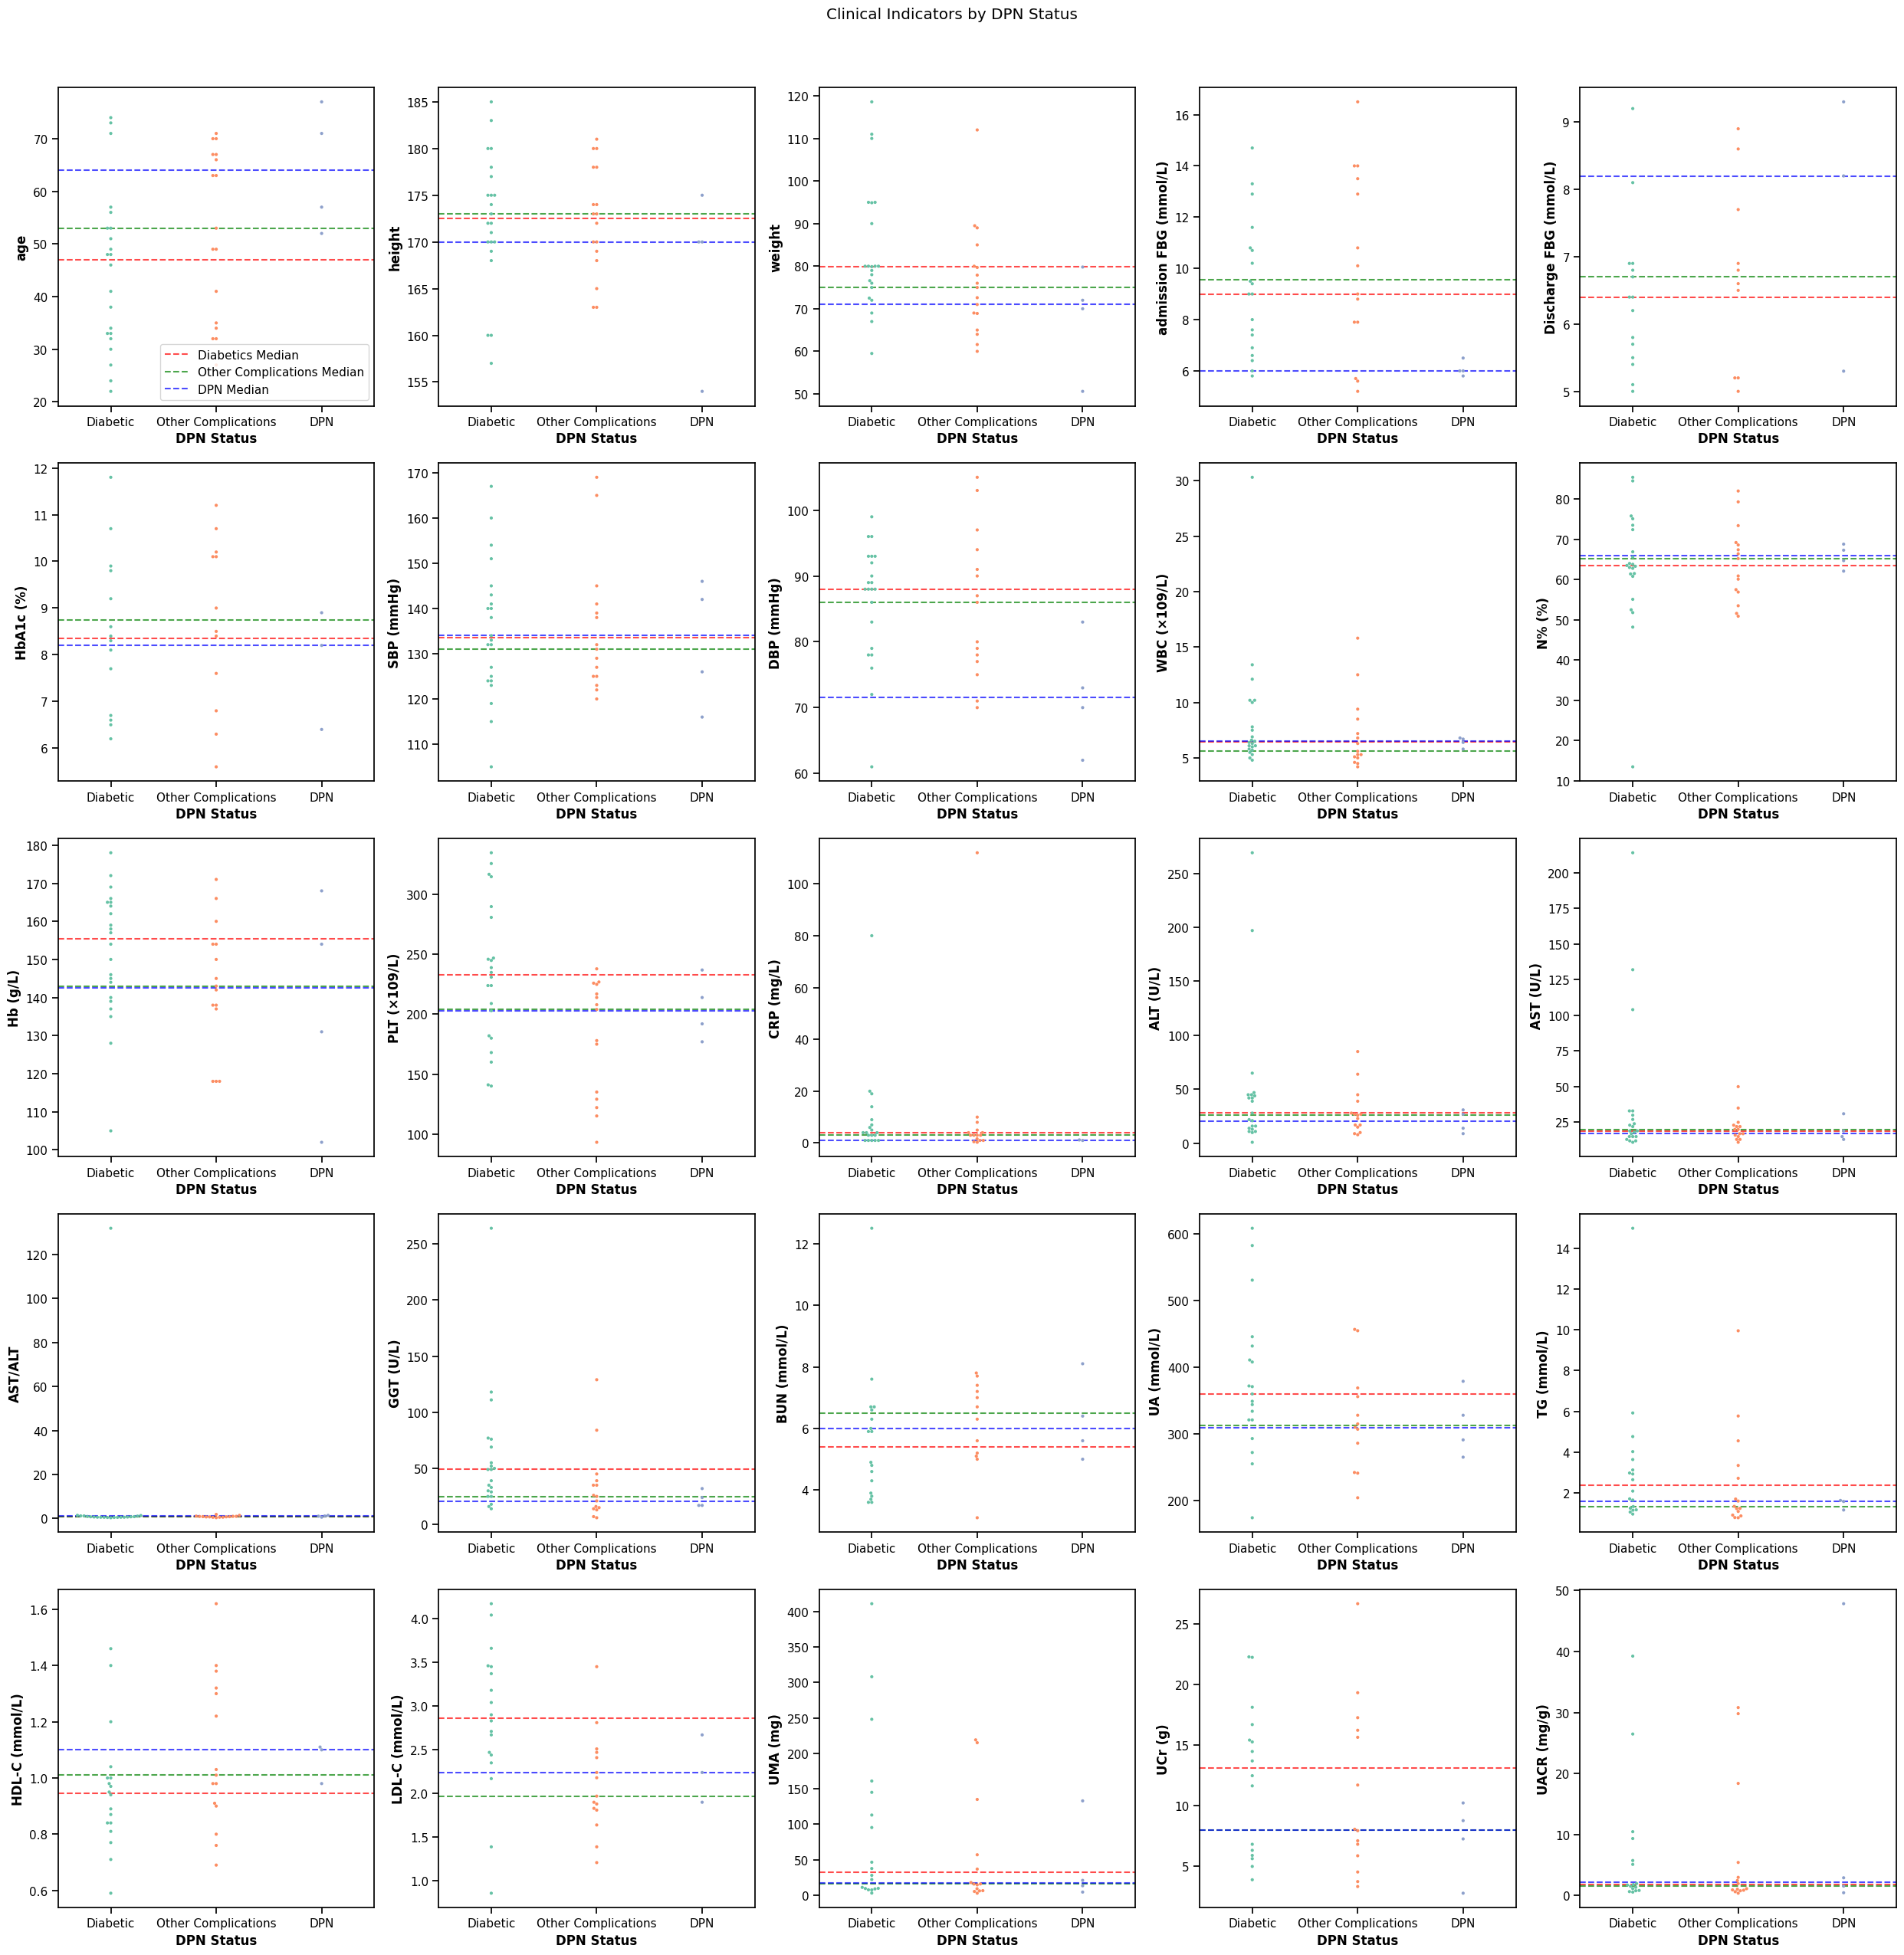

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate means
median_Diabetics = []
median_Complications = []
median_DPN = []

for i in range(25):
     median_Diabetics.append(reassembled_df[reassembled_df['Category'] == 'Diabetic'][column_names[2+i]].median())
     median_Complications.append(reassembled_df[reassembled_df['Category'] == 'Other Complications'][column_names[2+i]].median())
     median_DPN.append(reassembled_df[reassembled_df['Category'] == 'DPN'][column_names[2+i]].median())     


# Create figure and subplots
fig, axes = plt.subplots(5, 5, figsize=(25, 25))
fig.suptitle('Clinical Indicators by DPN Status', y=1.02)

# Flatten axes array for easy iteration
axes = axes.flatten()
counter=2
# Create beeswarm plots in each subplot
for ax in axes:

    sns.swarmplot(x='Category', y=column_names[counter], data=reassembled_df, hue='Category', palette='Set2', size=3, ax=ax)
    # Add mean lines
    ax.axhline(median_Diabetics[counter-2], color='red', linestyle='--', alpha=0.7, label='Diabetics Median')
    ax.axhline(median_Complications[counter-2], color='green', linestyle='--', alpha=0.7, label='Other Complications Median')
    ax.axhline(median_DPN[counter-2], color='blue', linestyle='--', alpha=0.7, label='DPN Median')
    ax.set_xlabel('DPN Status')
    ax.set_ylabel(column_names[counter])
    counter+=1
    if ax == axes[0]:
        ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Step 3: Create BMI Figure as Priya Said it Would be Interesting to Look at


In [11]:
import matplotlib as mpl
import plotly.express as px
palette = px.colors.qualitative.Plotly
palette, _ = px.colors.convert_colors_to_same_type(palette, colortype='tuple')
palette = [mpl.colors.rgb2hex(color) for color in palette]
px.defaults.color_discrete_sequence = palette
sns.set_palette(sns.color_palette(palette))
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelweight'] = 'bold'
sns.set_context("notebook", rc={"axes.labelweight": "bold"})
mpl.rcParams['scatter.marker'] = 'o'
mpl.rcParams['lines.markersize']=20

/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


<Figure size 400x600 with 0 Axes>

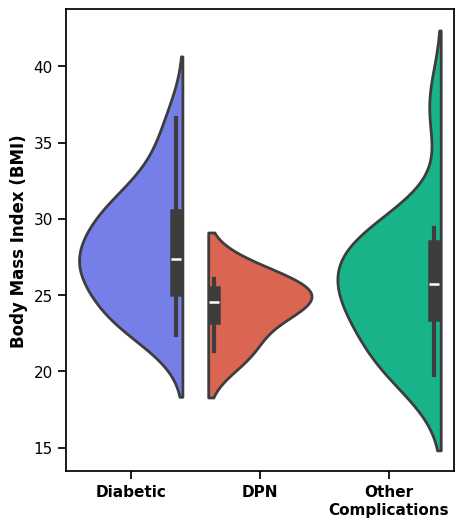

In [12]:


reassembled_df['BMI'] = reassembled_df['weight'] / ((reassembled_df['height']*0.01) ** 2)
plt.figure(figsize=(4, 6))
reassembled_df['Category'] = pd.Categorical(reassembled_df['Category'], categories=['Diabetic', 'DPN', 'Other Complications'], ordered=True)



def violin_metric(metric, df, y_label):
    plt.figure(figsize=(5, 6))
    sns.violinplot(x='Category', y=metric, data=df, hue='Category', split=True, inner="box", linewidth=2)
    plt.xlabel('DPN Status')
    plt.ylabel(metric)
    plt.ylabel(y_label)
    plt.xlabel(None)
    plt.xticks(fontweight='bold')
    plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


violin_metric('BMI', reassembled_df, 'Body Mass Index (BMI)')
plt.savefig('images/profiling/BMI_violin.png', dpi=600, bbox_inches='tight')

/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])
/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


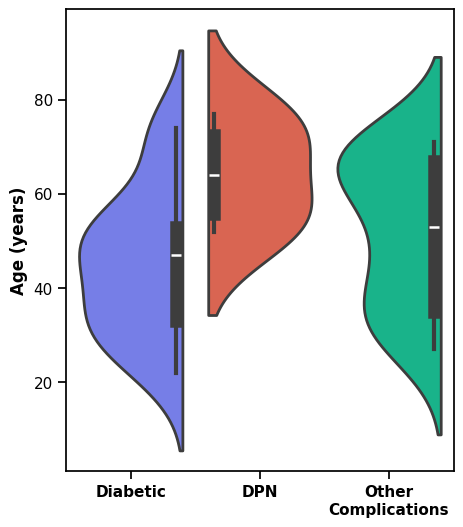

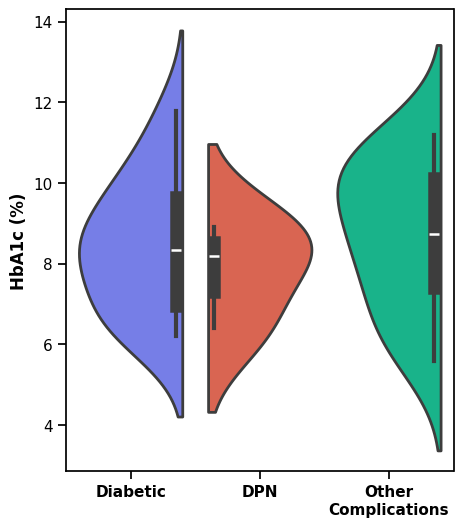

In [13]:
violin_metric('age', reassembled_df, 'Age (years)')
plt.savefig('images/profiling/age.png', dpi=600, bbox_inches='tight')

violin_metric('HbA1c (%)', reassembled_df, 'HbA1c (%)')

plt.savefig('images/profiling/HbA1c.png', dpi=600, bbox_inches='tight')

Now lets create a whole bunch of plots for the appendix! i want 3x3 so will use same size as the others, only need to work. out axes titles

In [19]:
used_axes=['age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']
axis_title=[ 'Height (cm)', 'Weight (kg)', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']
print(len(used_axes))
used_axes.remove('age')
used_axes.remove('HbA1c (%)')
print(len(used_axes))


25
23


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 0 
 Saved as: massive_composite_image/a.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 1 
 Saved as: massive_composite_image/b.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 2 
 Saved as: massive_composite_image/c.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 3 
 Saved as: massive_composite_image/d.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 4 
 Saved as: massive_composite_image/e.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 5 
 Saved as: massive_composite_image/f.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 6 
 Saved as: massive_composite_image/g.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 7 
 Saved as: massive_composite_image/h.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 8 
 Saved as: massive_composite_image/i.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 9 
 Saved as: massive_composite_image/j.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 10 
 Saved as: massive_composite_image/k.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 11 
 Saved as: massive_composite_image/l.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 12 
 Saved as: massive_composite_image/m.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 13 
 Saved as: massive_composite_image/n.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 14 
 Saved as: massive_composite_image/o.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 15 
 Saved as: massive_composite_image/p.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 16 
 Saved as: massive_composite_image/q.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 17 
 Saved as: massive_composite_image/r.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 18 
 Saved as: massive_composite_image/s.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 19 
 Saved as: massive_composite_image/t.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5, 6))
/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 20 
 Saved as: massive_composite_image/u.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 21 
 Saved as: massive_composite_image/v.png


/var/folders/zp/qrtzsyf510b122xcvc_z9xpc0000gn/T/ipykernel_5303/1086931037.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Diabetic', 'DPN', 'Other\nComplications'])


image: 22 
 Saved as: massive_composite_image/w.png


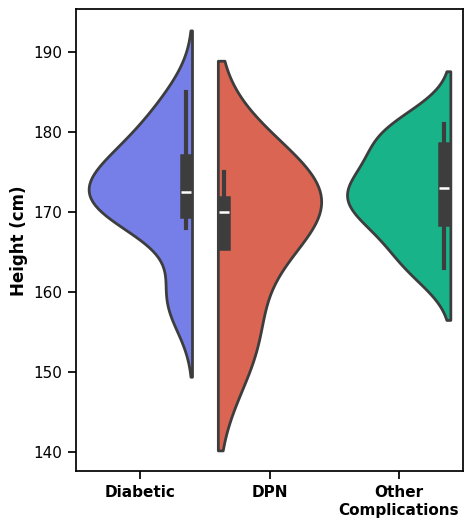

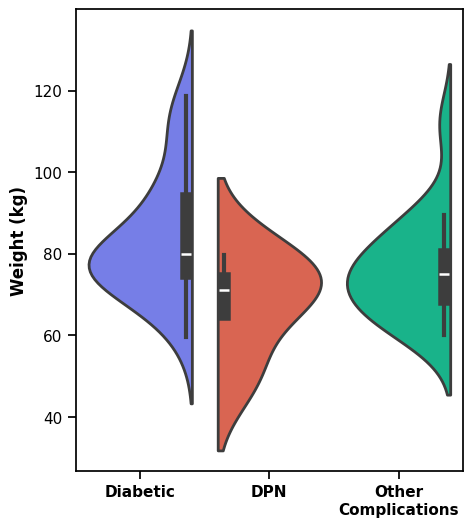

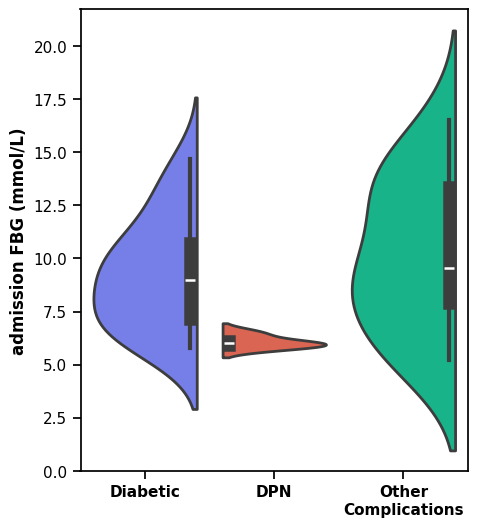

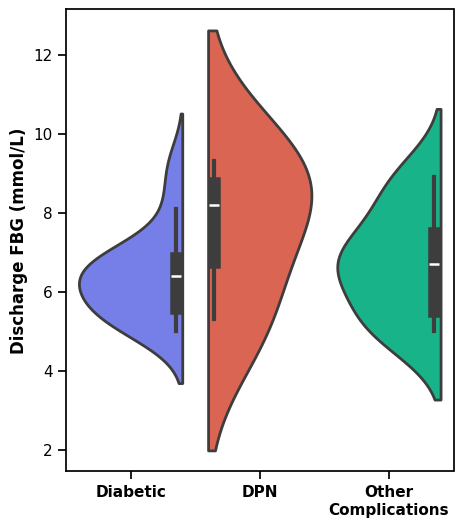

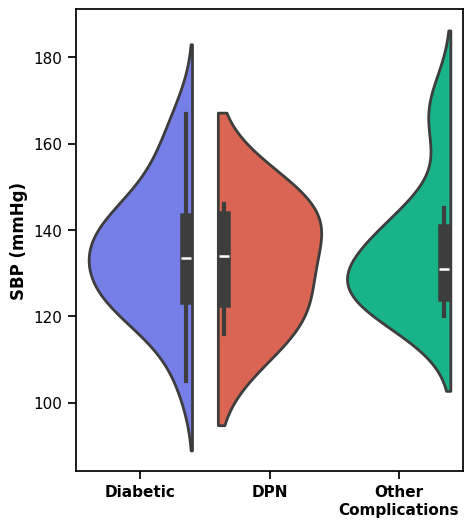

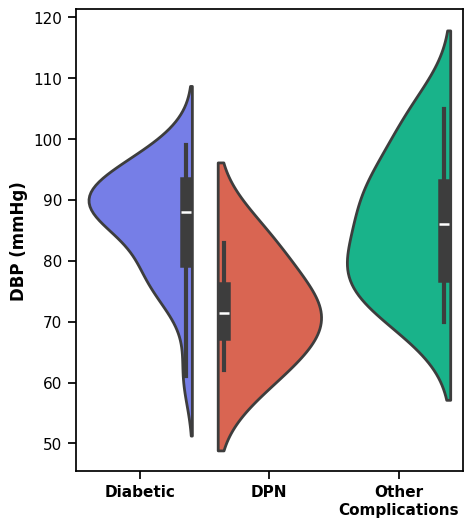

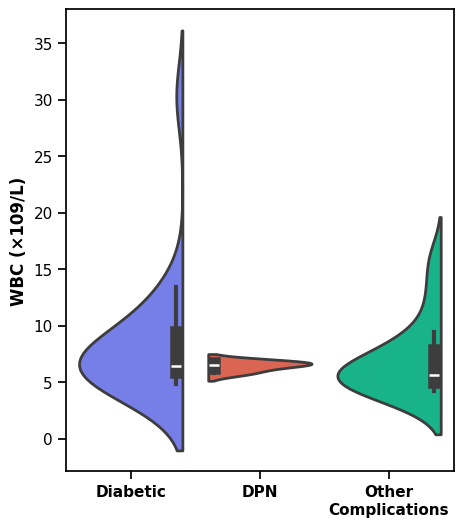

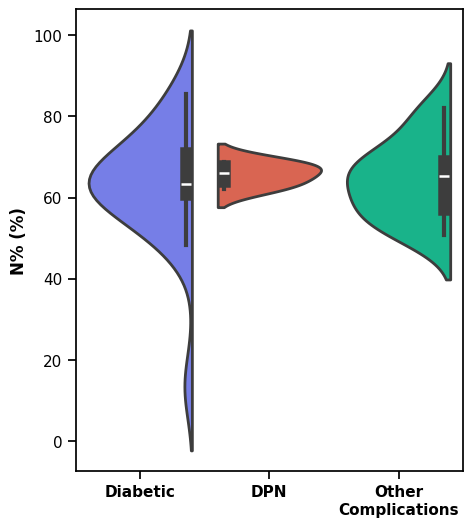

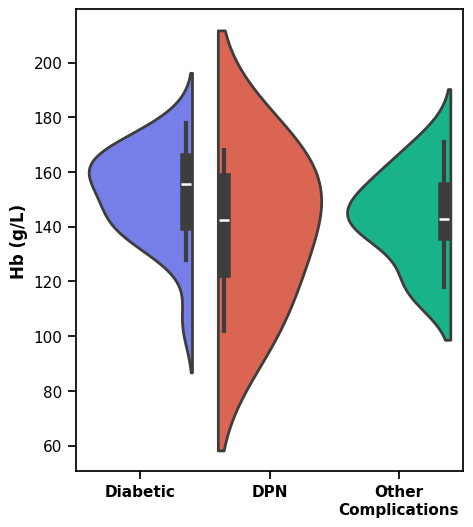

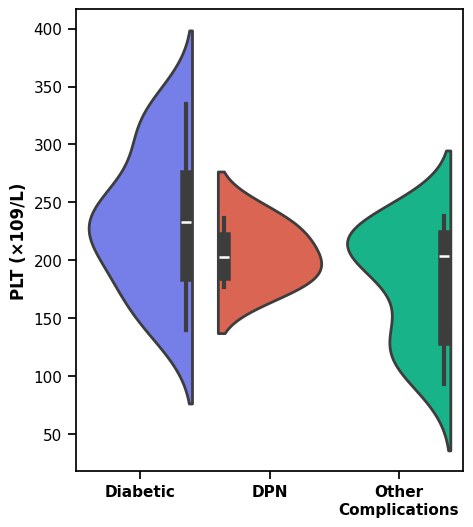

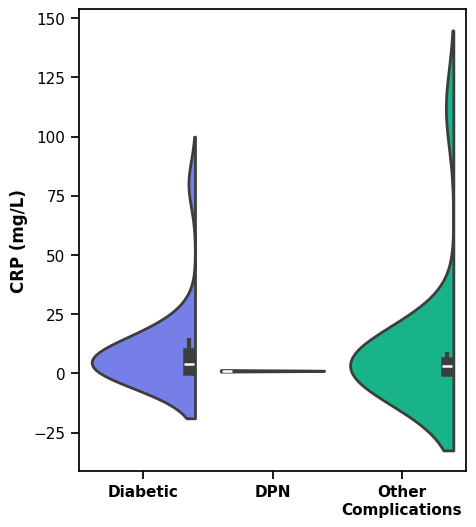

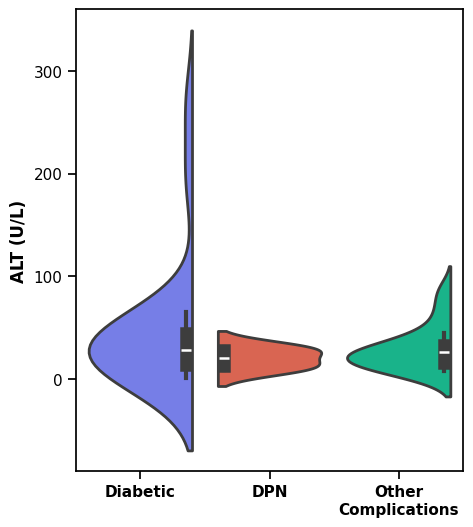

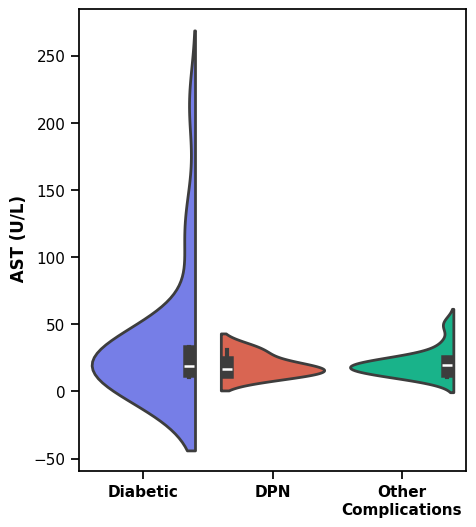

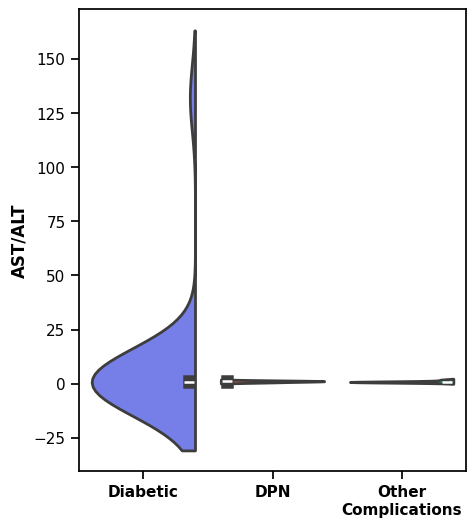

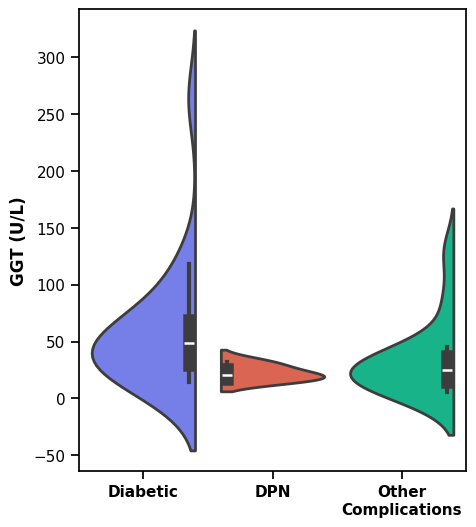

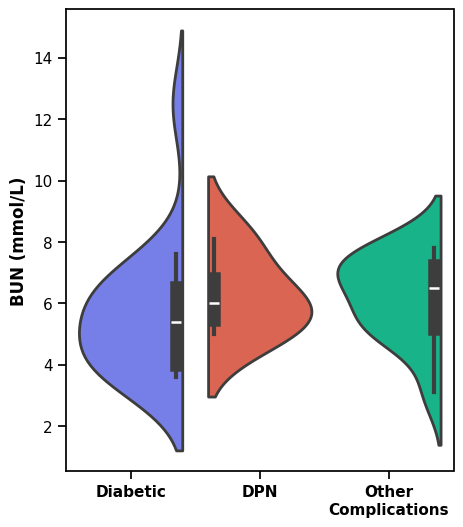

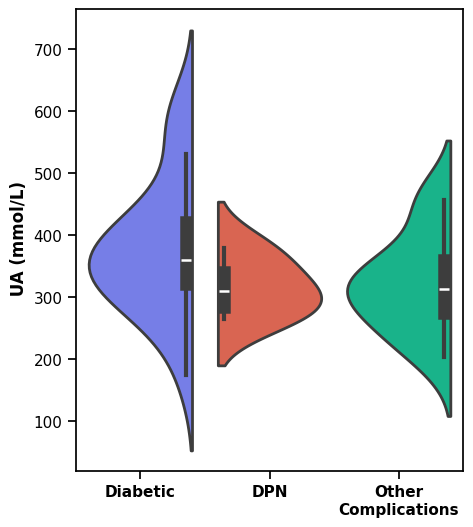

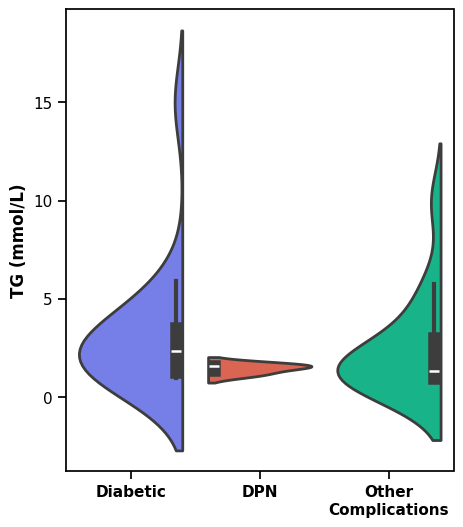

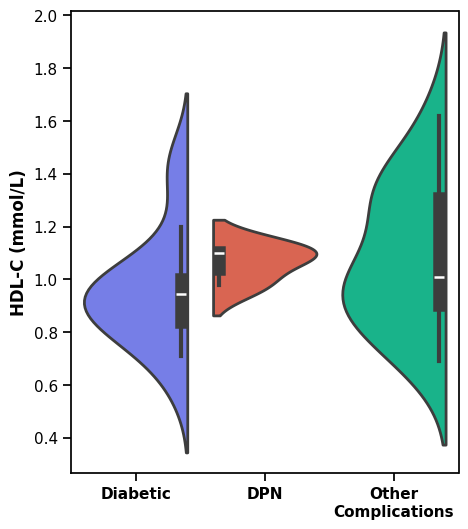

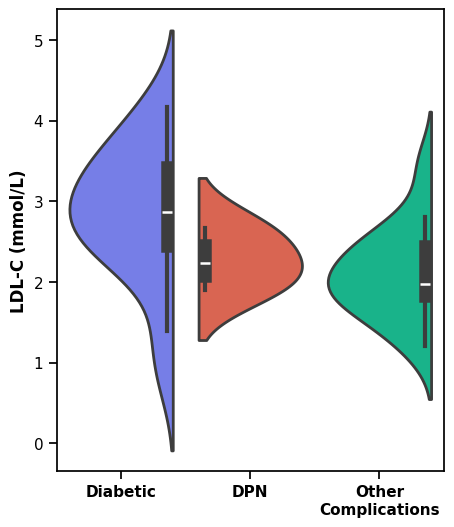

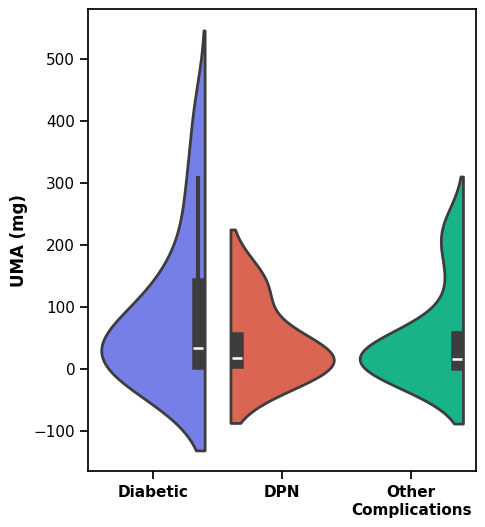

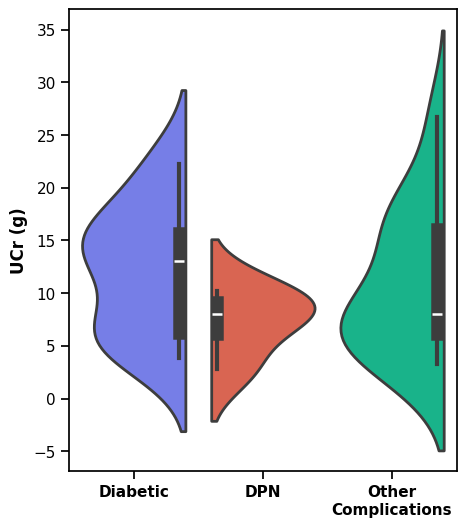

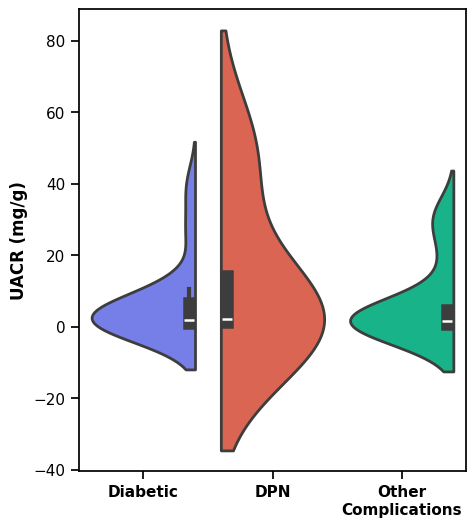

In [21]:
for image in range(len(used_axes)):
    violin_metric(used_axes[image], reassembled_df, axis_title[image])
    path='massive_composite_image/'+chr(97+image)+'.png'
    plt.savefig(path, dpi=600, bbox_inches='tight')
    print('image: '+str(image)+' \n Saved as: '+path)






### Step 4: Outlier Analysis

will do a normality test on each category then run a modified z score since each category has few data points. this will give us a value for each of the patients in each indication which can be plotted on a heatmap to easily discern how outlying the data is.

Firstly we will look at DPN patients as there are the fewest values.

In [ ]:
from scipy.stats import median_abs_deviation

dpn_patients = reassembled_df[reassembled_df['Category'] == 'DPN']

# Specify the columns to include
columns_to_include = ['number','age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Select the specified columns
dpn_selected = dpn_patients[columns_to_include]

# Fill missing values with the column median (or another strategy)
dpn_selected_filled = dpn_selected.fillna(dpn_selected.median())

# Calculate modified z-scores for each selected column
modified_z_scores = dpn_selected_filled.apply(
    lambda col: 0.6745 * (col - np.median(col)) / median_abs_deviation(col)
)
# Add 'number' column to the modified_z_scores DataFrame
modified_z_scores['number'] = dpn_selected['number']
# Set 'number' as the index
modified_z_scores.set_index('number', inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(modified_z_scores, cmap='coolwarm', center=0, annot=True, fmt=".1f", vmin=-5, vmax=5)
plt.title('Modified Z-Scores for DPN Patients')
plt.xlabel('Features')
plt.ylabel('Patient Number')
plt.show()

In [ ]:
Diabetic_patients = reassembled_df[reassembled_df['Category'] == 'Diabetic']

# Specify the columns to include
columns_to_include = ['number','age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Select the specified columns
dpn_selected = Diabetic_patients[columns_to_include]

# Fill missing values with the column median (or another strategy)
dpn_selected_filled = dpn_selected.fillna(dpn_selected.median())

# Calculate modified z-scores for each selected column
modified_z_scores = dpn_selected_filled.apply(
    lambda col: 0.6745 * (col - np.median(col)) / median_abs_deviation(col)
)
# Add 'number' column to the modified_z_scores DataFrame
modified_z_scores['number'] = dpn_selected['number']
# Set 'number' as the index
modified_z_scores.set_index('number', inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(modified_z_scores, cmap='coolwarm', center=0, annot=True, fmt=".1f", vmin=-5, vmax=5)
plt.title('Modified Z-Scores for Diabetic-Only Patients')
plt.xlabel('Features')
plt.ylabel('Patient Number')
plt.show()

In [ ]:
Diabetic_comp_patients = reassembled_df[reassembled_df['Category'] == 'Other Complications']

# Specify the columns to include
columns_to_include = ['number','age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Select the specified columns
dpn_selected = Diabetic_comp_patients[columns_to_include]

# Fill missing values with the column median (or another strategy)
dpn_selected_filled = dpn_selected.fillna(dpn_selected.median())

# Calculate modified z-scores for each selected column
modified_z_scores = dpn_selected_filled.apply(
    lambda col: 0.6745 * (col - np.median(col)) / median_abs_deviation(col)
)
# Add 'number' column to the modified_z_scores DataFrame
modified_z_scores['number'] = dpn_selected['number']
# Set 'number' as the index
modified_z_scores.set_index('number', inplace=True)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(modified_z_scores, cmap='coolwarm', center=0, annot=True, fmt=".1f", vmin=-5, vmax=5)
plt.title('Modified Z-Scores for Diabetic Patients with Other Complications')
plt.xlabel('Features')
plt.ylabel('Patient Number')
plt.show()

### Normality test

In [ ]:
from scipy.stats import shapiro
boolean_normality = []
test_stats = []
p_values= []
def test_normality(data, column):
    """Test normality of a column using Shapiro-Wilk test, with debugging info"""
    # Convert to numeric and drop NaN values
    clean_data = pd.to_numeric(data[column], errors='coerce').dropna()
    
    # Print debugging information
    print(f"\nTesting column: {column}")
    print(f"Original length: {len(data[column])}")
    print(f"Valid values: {len(clean_data)}")
    
    # If there's not enough data after cleaning
    if len(clean_data) < 3:
        print("WARNING: Not enough valid values for Shapiro-Wilk test (needs ≥3)")
        test_stats.append(float('nan'))
        p_values.append(float('nan'))
        boolean_normality.append(False)
        return
        
    stat, p = shapiro(clean_data)
    test_stats.append(stat)
    p_values.append(p)
    boolean_normality.append(p > 0.05)
    print(f"Test successful. Statistic: {stat:.3f}, p-value: {p:.3f}")

# List of numerical columns to test
numerical_columns = ['age', 'height', 'weight', 'admission FBG (mmol/L)', 'Discharge FBG (mmol/L)', 'HbA1c (%)', 'SBP (mmHg)', 'DBP (mmHg)', 'WBC (×109/L)', 'N% (%)', 'Hb (g/L)', 'PLT (×109/L)', 'CRP (mg/L)', 'ALT (U/L)', ' AST (U/L)', 'AST/ALT', 'GGT (U/L)', 'BUN (mmol/L)', ' UA (mmol/L)', 'TG (mmol/L)', 'HDL-C (mmol/L)', 'LDL-C (mmol/L)', 'UMA (mg)', 'UCr (g)', 'UACR (mg/g)']  # Replace with your column names

# Test normality for each column
for column in numerical_columns:
    test_normality(Diabetic_patients, column)

# Create DataFrame with results
normality_df = pd.DataFrame({
    'Column': numerical_columns,
    'Normal': boolean_normality,
    'Statistic': test_stats,
    'p-value': p_values
})

normality_df